## Programming for Data Analysis - Project 1 ##

**Name: James McEneaney** <br/><br/>
**Course: Higher Diploma in Computing in Data Analytics, ATU Ireland** <br/><br/> 
**Semester: Semester 2 2023** <br/><br/>


***

## Introduction ##

This project sets out to simulate traffic levels between junctions 6 and 7 on the m50 for four weeks during the month of October 2023. I will seek to establish how traffic levels are related to whether the day is a weekday or weekend, how traffic is distributed on average over a 24 hour period, and how the distribution of northbound traffic compares with southbound traffic.

To carry out this analysis, I have downloaded the monthly volume report for this traffic October 2023 from the site https://trafficdata.tii.ie/calendar_alt.asp?sgid=XZOA8M4LR27P0HAO3_SRSB&spid=130DE8EB2080. 

This dataset is of interest to me, as I currently travel on the m50 to work five days per month, and a better understanding of how traffic levels are distributed on the m50 would help me better plan my commute. I chose the area between junctions 6 and 7 as it strikes me as a busy area of the m50 during my commute.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [27]:
df = pd.read_csv("J6_traffic_hourly_ints.csv")
print(df)

     week  hour  day day_type  southbound  northbound
0       1     0  Mon  weekday         812         461
1       1     1  Mon  weekday         515         266
2       1     2  Mon  weekday         410         283
3       1     3  Mon  weekday         311         546
4       1     4  Mon  weekday         629        1018
..    ...   ...  ...      ...         ...         ...
667     4    19  Sun  weekend        2889        2676
668     4    20  Sun  weekend        2172        2004
669     4    21  Sun  weekend        1490        1540
670     4    22  Sun  weekend        1582        1138
671     4    23  Sun  weekend        1192         845

[672 rows x 6 columns]


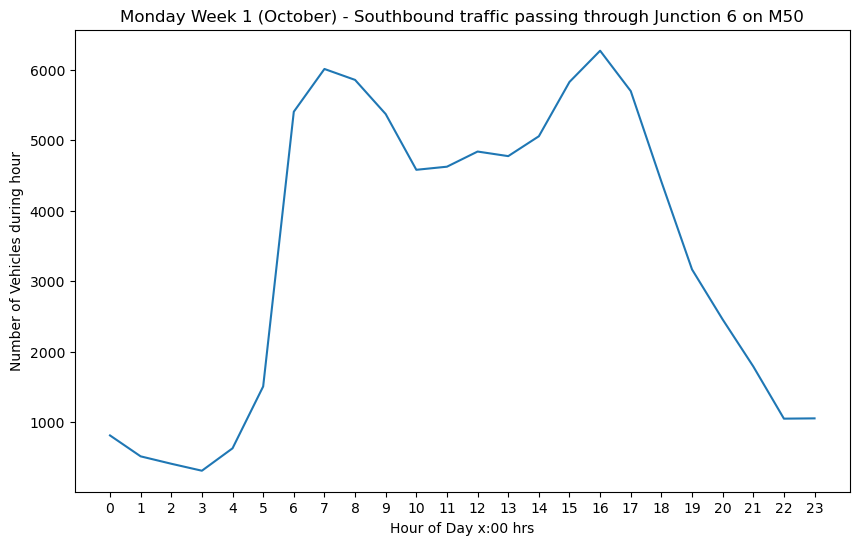

In [28]:
monday_wk1 = df.loc[(df['day'] == 'Mon') & (df['week'] == 1)]

plt.figure(figsize=(10,6))
plt.plot(monday_wk1['hour'], monday_wk1['southbound'])
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))      # separate x-axis into intervals of 1 hour rather
plt.ylabel('Number of Vehicles during hour')
plt.title('Monday Week 1 (October) - Southbound traffic passing through Junction 6 on M50')
plt.show()

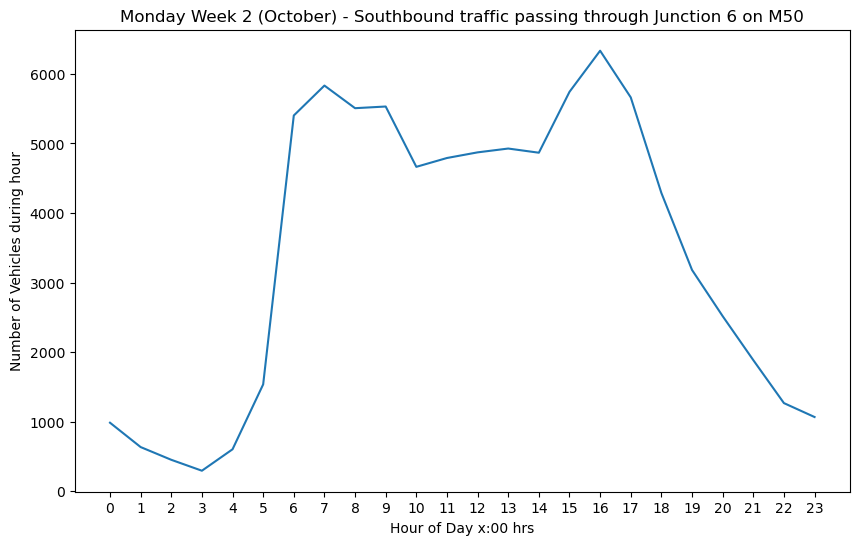

In [29]:
monday_wk2 = df.loc[(df['day'] == 'Mon') & (df['week'] == 2)]

plt.figure(figsize=(10,6))
plt.plot(monday_wk2['hour'], monday_wk2['southbound'])
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))      # separate x-axis into intervals of 1 hour rather
plt.ylabel('Number of Vehicles during hour')
plt.title('Monday Week 2 (October) - Southbound traffic passing through Junction 6 on M50')
plt.show()

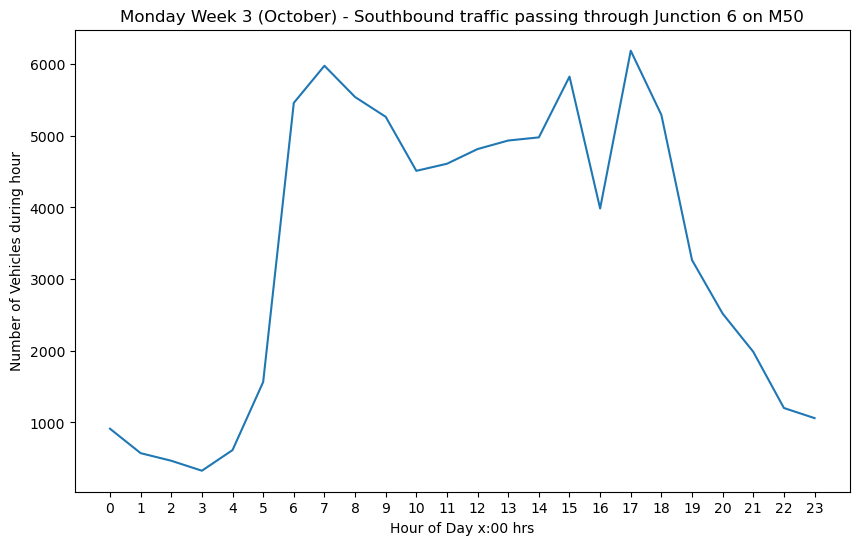

In [30]:
monday_wk3 = df.loc[(df['day'] == 'Mon') & (df['week'] == 3)]

plt.figure(figsize=(10,6))
plt.plot(monday_wk3['hour'], monday_wk3['southbound'])
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))      # separate x-axis into intervals of 1 hour rather
plt.ylabel('Number of Vehicles during hour')
plt.title('Monday Week 3 (October) - Southbound traffic passing through Junction 6 on M50')
plt.show()

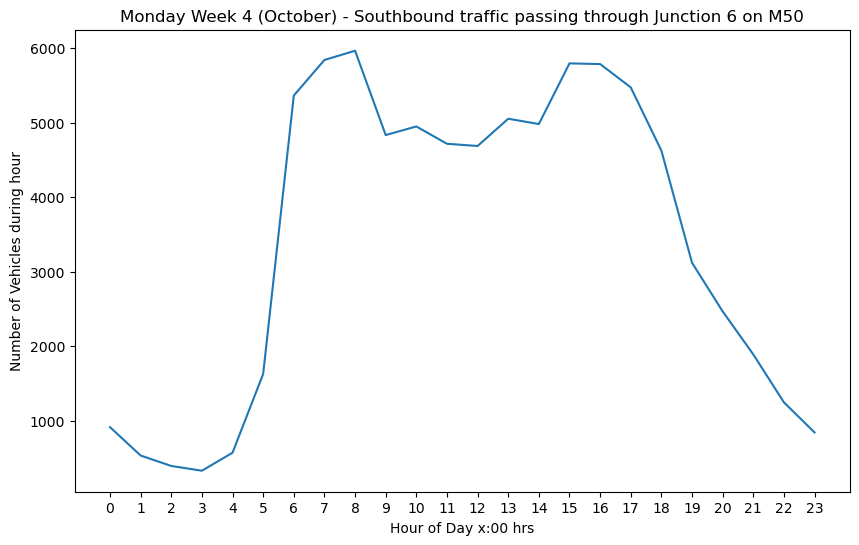

In [31]:
monday_wk4 = df.loc[(df['day'] == 'Mon') & (df['week'] == 4)]

plt.figure(figsize=(10,6))
plt.plot(monday_wk4['hour'], monday_wk4['southbound'])
plt.xlabel('Hour of Day x:00 hrs')
plt.xticks(np.arange(24))      # seperate x-axis into 24 intervals rather than 5
plt.ylabel('Number of Vehicles during hour')
plt.title('Monday Week 4 (October) - Southbound traffic passing through Junction 6 on M50')
plt.show()